<h1><center>Spotify Data Scraping</center></h1>

In this article, we will learn about {Glossary- **Web scraping**}. To accomplish this task, we will use the very popular music streaming app Spotify. During this article, we will learn how to **scrape data from Spotify**. Our aim through this  hands-on experience of web scraping is to **fetch the information of all the tracks in spotify playlists**. We can obtain the information of tracks of any playlist, we only need to have **URI (Uniform Resource Identifier) of a playlist**. 

This scraping will be facilitated by the <b>Web API of Spotify</b>, known as **Spotipy**.

For availing the services of **spotipy**, user requires two credential keys, which are **credential_id** and **credential_secret**. These two keys are unique for each user and helps spotify in identifying the users of their Web API. In the following part of this article, I will walkthrough the steps on how to create these two unique keys through spotify developers account with the help of screenshots.


<h2>Generating Authorizing Keys</h2>

<ul>
    <h3>Step 1: Creating Spotify Developers Account</h3><br><br>
    <center><img src="image_1.png" height=600 width=600><br><br></center>
    <center>---------------------------------------------------------------------</center>
    <center><img src="image_2.png" height=400 width=400><br><br></center>
    <center>---------------------------------------------------------------------</center>
    <center><img src="image_3.png" height=400 width=400><br><br></center>
    <center>---------------------------------------------------------------------</center>
    For creating an account on <a href="https://developer.spotify.com/dashboard/">spotify developers website</a>, you can either use your existing spotify account which you use for listening music, otherwise you can sign up using your facebook account or through your mail id.
    
   <h3>Step 2: Creating a New App</h3>
   After creating the account and logging in, you will find a screen as shown below.
   <img src="image_4.png" height=600 width=600><br><br>
   <center>---------------------------------------------------------------------</center>
   The next thing which we have to do is to create a new app by either clicking on <b>create client id</b> button or by clicking on <b>create new app</b> button. 
   <img src="image_5.png" height=200 width=200><br><br>
   After this, spotify asks some basic questions regarding our new app. After this, you have to tell Spotify whether you will use the app for any monetary advantages i.e. whether the app is commerical or not. It is advised to choose the non-commerical option. Lastly, we need to agree to some permissions and agreements.
   <img src="image_6.png" height=250 width=250><br><br>
   <center>---------------------------------------------------------------------</center>
   <img src="image_7.png" height=250 width=250><br><br>
   <center>---------------------------------------------------------------------</center>
   
   <h3>Step 3: Obtaining Client Id and Client Secret Keys</h3>
   <img src="image_8.png" height=800 width=800><br><br>
   <center>---------------------------------------------------------------------</center>
   Once the app is created, we will be able to see a dashboard where along with the name of our app and description, below the description we will find <b>32 character long alphanumeric</b> <b>Client Id</b> and below this will get the 32 character long alphanumeric <b>Client Secret</b>. So this was the aim of the walkthrough, we have obtained the two keys required for authorizing the usage of spotify Web API.

</ul>

**NOTE** - Remember not to use the keys visible in the above image, as mentioned earlier these are unique keys and thus you'll be required to create them for your app, otherwise you may encounter error.

Now it's time to start our hands-on practical example where we will **fetch the playlists data and track information using spotipy**. 

## Importing libraries and authorization credentials
Initially, we need to load the necessary libraries and credential files. 

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

For better access to credential keys, We will load these **authorizational keys in a .json file, simplifying the process of fetching**. 

Below code shows how you can add the two keys in the **authorization.json** file.

#### Contents of Authorization.json

Remember the below keys are for represential purpose, you are required to create your own client id and client secret on the spotify developers account.

In [2]:
{"client_id": "5e9a80618b284145b54bb1f7df94bb6c",
"client_secret": "0cdef7160e4143118e48abdd939668e8"}

{'client_id': '5e9a80618b284145b54bb1f7df94bb6c',
 'client_secret': '0cdef7160e4143118e48abdd939668e8'}

In another  **playlists_like_dislike.json** file, We have mentioned the **URI (Uniform Resource Identifier)** of the playlists. This file will help in managing the URI of multiple playlists. As informed earlier, URI helps in identifying different playlists on spotify.

One of the features of **playlists_like_dislike.json** file is the **like** attribute which takes boolean value. Using this boolean value, we can tell which **playlists songs a user likes or dislikes**. If **true**, the user **likes all the songs** of playlist and if **false**, the user **dislikes all the songs** of playlist. 

We can see below how the playlists URI should be mentioned along with the **like** parameter.

**NOTE** - You can fetch data of upto **99 songs in a single connection session**. Now these 99 songs can be divided into different playlists or can be present in a single playlist. If you will try to fetch information of more than 99 songs in a single connection session, then you will encounter error and you will not be able to fetch the data, as per Spotify's policy.

#### Contents of Playlists_like_dislike.json 

[
    {"uri": "spotify:user:Test_1:playlist:27rVIOLKlIKAg63whXrAzz",
    "like": true},
    {"uri": "spotify:user:Test_2:playlist:6WjtPvXBC2iSO24VsfBpnc",
    "like": false}
]

<img src="image_9a.png" height=600 width=600><br><br>
<center>---------------------------------------------------------------------</center>

In the above image, you can see the location from where you can obtain the URI of a particular playlist, in case of **Spotify desktop app**. You have to click at these three dots and then you can copy the URI of desired playlist. Here playlist link and Spotify URI contain the same link. So you can copy any of these. The URI is **20 character long alphanumeric code** which is present at the end of the link.

The below image is an example of web app of Spotify, so if you are using the web app, then you will see something as shown below.

<img src="image_10.png" height=600 width=600><br><br>
<center>---------------------------------------------------------------------</center>

This URI will help while communicating with spotify API and also in fetching the correct information of the songs present in the playlists.

Along with this, there can be multiple playlists in a single .json file, so to access each playlist, indexing is used and here, **0th** index playlist is accessed using below code. 

In [3]:
credentials = json.load(open('authorization.json'))
client_id = credentials['client_id']
client_secret = credentials['client_secret']

playlist_index = 1

playlists = json.load(open('playlists_like_dislike.json'))
playlist_uri = playlists[playlist_index]['uri']
like = playlists[playlist_index]['like']

In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Information of tracks in playlist

For obtaining the **username and playlist_id**, we are using the **:**  as an identifier. These unique id's help in getting the tracks of each playlist.

In [5]:
uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]

In [6]:
results = sp.user_playlist(username, playlist_id, 'tracks')

## Fetching details of track like ID's, Titles and Artists

Here data for each playlist is collected in the form of dictionary. The keys of this dictionary contains track information. We will use **list datatype for adding data like ID's, Titles and Artists.** 

Artists mentioned are the primary artists in the each track.

In the below mentioned **for** loop, we are going over each track of a playlist and adding the track Id, name and artist information to the dataframe of tracks.

In [7]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

## Extracting Audio Features of each track

Spotify has a unique attribute of providing information about the features of song available on their platform. There are various features like danceability, energy, tempo, and many more. You can have a look at them <a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/">here</a>. After fetching these audio features, they will be stored in a dataframe.

In [8]:
features = sp.audio_features(playlist_tracks_id)

In [9]:
import numpy as np
import pandas as pd

In [10]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

## Merging Dataframes for getting audio features and track information

Now the dataframe of audio features must be merged with title and artist information. We will also reorder the dataframe for better accessiblity.

In [11]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
70,4eu27jAU2bbnyHUC3G75U8,Badtameez Dil,Benny Dayal,"[Benny Dayal, Shefali Alvares]",0.805,0.932,2,-2.228,0,0.24000,0.00000,0.2160,0.792,106.019,252760,4
71,7oDykOViQGiV9M3enF7u4Y,La La La,Neha Kakkar,"[Neha Kakkar, Arjun Kanungo]",0.774,0.781,10,-4.426,1,0.34100,0.00000,0.1110,0.469,100.017,192000,4
72,79JMjG6tj2zvCDEukCSgcx,Laung Gawacha,Nucleya,"[Nucleya, Avneet Khurmi]",0.571,0.900,0,-4.855,0,0.00502,0.00916,0.0952,0.414,91.985,213913,4
73,5T3rp70MEW4XnWv82BDVey,Nikle Currant,Jassie Gill,"[Jassie Gill, Neha Kakkar, Sukh-E Muzical Doct...",0.811,0.921,5,-3.152,0,0.18200,0.00000,0.8230,0.756,94.980,212925,4
74,01X09TTUbyJWQPlv28gUss,Prada,Jass Manak,[Jass Manak],0.721,0.650,9,-5.426,0,0.03610,0.00000,0.3580,0.502,156.008,182115,4


## Data Exploration

To understand the scraped data in a better way, we will perform **data exploration with the help of visualization**.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The following **count plot** will tell which **artists have most number of songs** in the playlist.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

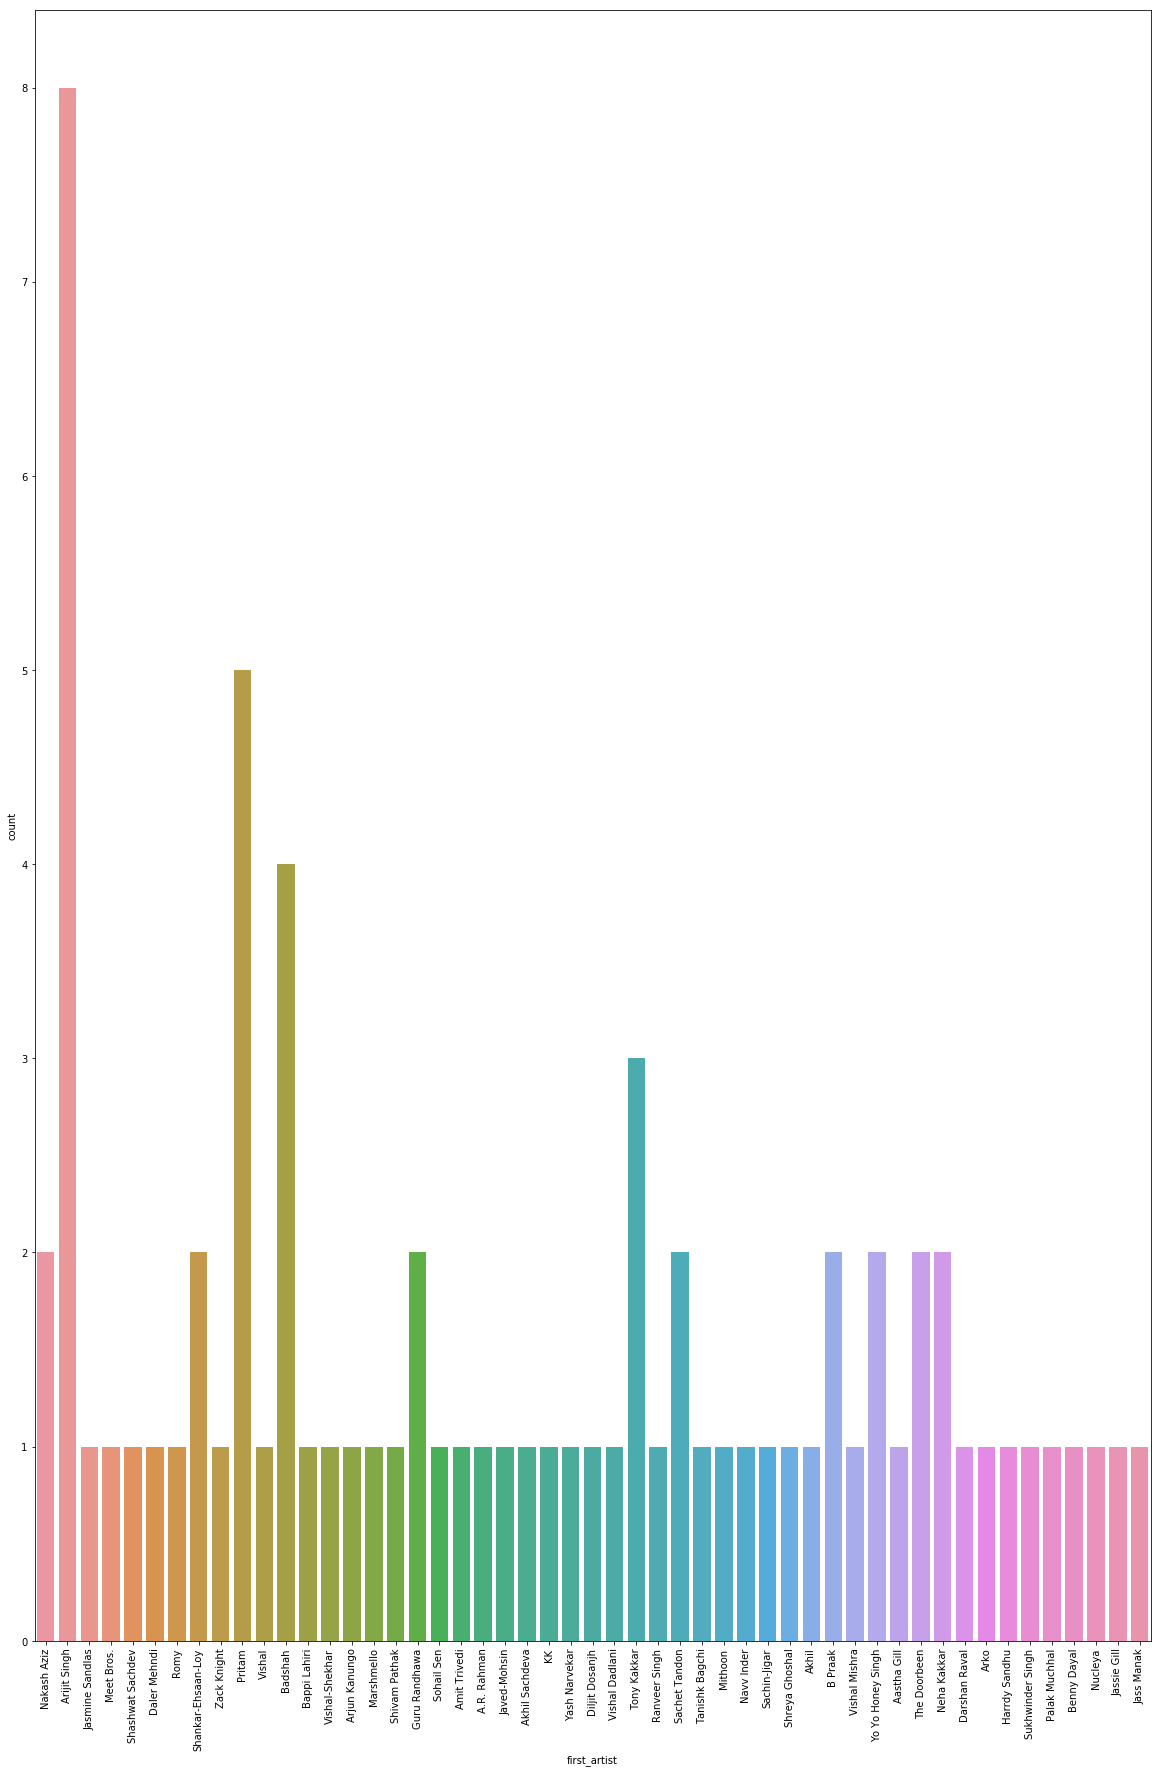

In [13]:
plt.figure(figsize=(20,30))
sns.countplot(features_df['first_artist'])
plt.xticks(rotation=90)

In [14]:
#features_df = features_df.drop(['first_artist', 'all_artists'], axis=1)

## Spotify Audio Analysis

Spotify provides the feature where a song can be analysed on the basis of bars, beats, sections, tatum and segments in the song. You can learn more about these attributes from <a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/">here</a>.Since beats and tatums represent the same information in scaled form depicted by bars, we will only consider bars, sections and segments. 

**NOTE** - These attributes of each audio track provides in-depth technical information and thus it takes time in processing and fetching. So some time will be spent here in fetching all the information. The output **retrying ...** is the default message displayed by Spotipy for informing the user.

In [15]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...2secs
retrying ...1secs
retrying ...1secs
retrying ...1secs


Visualizing the **audio options** to learn more about them.

Text(0.5, 0, 'num_segments')

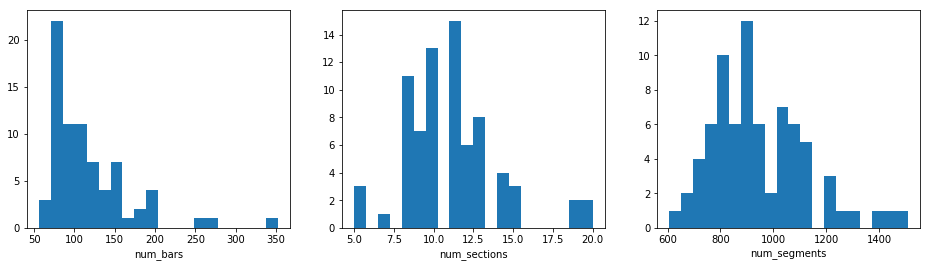

In [16]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,2)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')

Now we will add these audio features to our existing dataframe which will enhance our dataset.

In [17]:
features_df['num_bars'] = num_bars
features_df['num_sections'] = num_sections
features_df['num_segments'] = num_segments
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,7oRA6vzbUl5brLK7GDcKOJ,"Fikar Not (From ""Chhichhore"")",Nakash Aziz,"[Nakash Aziz, Dev Negi, Amit Mishra, Amitabh B...",0.608,0.848,5,-6.826,0,0.3750,0.001800,0.0580,0.869,185.884,189073,3,191,10,903
1,5cgKosPPj5Cs9a2JQufUc1,Ilahi,Arijit Singh,[Arijit Singh],0.594,0.967,9,-5.767,1,0.1660,0.000025,0.1050,0.452,132.009,228982,4,124,11,899
2,5fXslGZPI5Cco6PKHzlSL3,"Illegal Weapon 2.0 (From ""Street Dancer 3D"")",Jasmine Sandlas,"[Jasmine Sandlas, Garry Sandhu, Tanishk Bagchi...",0.805,0.919,1,-1.294,1,0.1010,0.003430,0.0598,0.494,94.993,188606,4,72,9,895
3,06wTXKpDMrSp5OfB7MErpx,Befikra,Meet Bros.,"[Meet Bros., Aditi Singh Sharma]",0.600,0.979,10,-3.513,1,0.1380,0.000000,0.1000,0.453,137.064,351579,4,200,20,1443
4,6gbZvxPMHrpIA8RAscDO9D,Jigra,Shashwat Sachdev,"[Shashwat Sachdev, Siddharth Basrur]",0.712,0.655,8,-7.813,1,0.0694,0.000000,0.1030,0.145,99.978,240000,4,98,10,1017


The following code helps in generating **.csv** file for a playlist. This **.csv** file which contains the above dataframe information will be stored in the same folder where this **jupyter notebook** is stored. Remember to add the **.csv** extension to each file. 

<h3>Creating Large Dataset</h3>

The below csv file will consist the information of only single playlist whose index was provided initially, to execute it for multiple playlists, you can use a **for loop** and can run over each playlist and thus creating a large dataset. 

So for all the URI's provided in the **playlists.like_dislike.json** file, you will be having a new .csv file with the information of the particular playlist in it. In this way you can build a large dataset of **.csv** files.

In [18]:
features_df.to_csv("playlist_" + str(playlist_index) + ".csv", encoding='utf-8',index="false")

# Conclusion

So we have reached at the endpoint of this interactive article on Web Scraping. In this article, we learned how to scrape playlist information of different users with the help of **Spotify Web API**, known as **Spotipy**. We fetched each and every audio feature available for the tracks. This article also covered how we can create a dataset of playlists and its tracks information. For exploring more and understanding the deeper details of spotipy, you can refer the below mentioned links.

<a href="https://developer.spotify.com/documentation/web-api/">Web API Spotipy</a>

<a href="https://spotipy.readthedocs.io/en/2.9.0/">Spotipy Official Documentation</a>

### Glossary - Web Scraping 

It is the process of extracting data from websites for creating large datasets which can be stored on our local computer or in a database. There are various ways of performing Web Scraping. It can be done through automated tools like **Scrapy, Selenium web driver**. The other method is by using **individual websites web API** and sometimes we can also build **custom web scraper** for a website by analysing the html code of the webpage(Page from where data is scraped).